In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import math
%matplotlib inline
%run helpers.py

Q1 Make Trackbar for the following images to tune the parameters of canny
detection.

Observation:  Changing the parameters of Threshold1 and Threshold2 by the teackbar affects the accurecy of the line lanes on the road / how accurate the lines sre drawn on the road as wanted 

(<matplotlib.image.AxesImage at 0x2126f35e890>,
 Text(0.5, 1.0, 'solidYellowCurve2'))

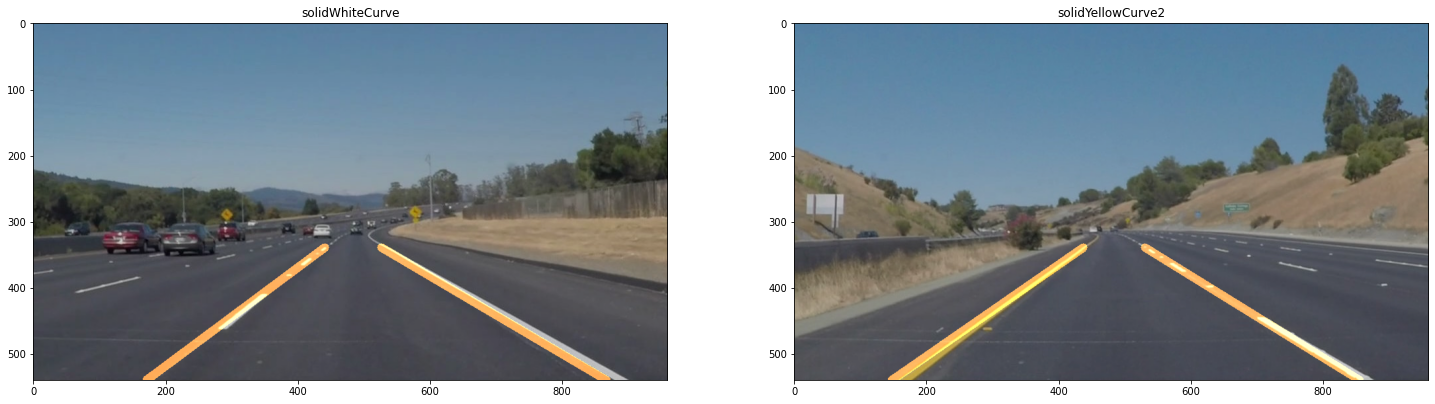

In [ ]:

def nothing(x):
  return
cv2.namedWindow('Canny tunning')
cv2.createTrackbar('CANNY_THRESHOLD_1','Canny tunning',35,45,nothing)
cv2.createTrackbar('CANNY_THRESHOLD_2','Canny tunning',45,55,nothing)

while(1):
 
    CANNY_THRESHOLD_1= cv2.getTrackbarPos('CANNY_THRESHOLD_1','Canny tunning')
    CANNY_THRESHOLD_2= cv2.getTrackbarPos('CANNY_THRESHOLD_2','Canny tunning')
    def canny_edges(gray): 
        kernel_size = 5 
        blur_gray= cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
        edges = cv2.Canny(blur_gray, CANNY_THRESHOLD_1, CANNY_THRESHOLD_2)
        return(edges)
    k=cv2.waitKey(1)
    if(k==ord('q')):
      break
cv2.destroyAllWindows()

#HOUGH LINES PARAMETERS
RHO = 1                 
THETA = np.pi/180       
MIN_VOTES = 10                         
MIN_LINE_LEN = 5 
MAX_LINE_GAP = 25 

def hough_lines(img):
    lines = cv2.HoughLinesP(img, RHO, THETA, MIN_VOTES, np.array([]), minLineLength=MIN_LINE_LEN, maxLineGap=MAX_LINE_GAP)
    return lines

# Read the image:
image  = cv2.imread('C:\\Users\\Lenovo\\Desktop\\solidWhiteCurve.jpg') #Read images
image2 = cv2.imread('C:\\Users\\Lenovo\\Desktop\\solidYellowCurve2.jpg')
image  = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

gray_img  = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)#convert to gray
gray_img2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

edges_img  = canny_edges(gray_img) #call Canny
edges_img2 = canny_edges(gray_img2)

ROI_edges_img  = helpers_masked_edges(edges_img) #ROI
ROI_edges_img2 = helpers_masked_edges(edges_img2)

lines = hough_lines(ROI_edges_img) #HOUGH LINES
hough_lines_image = helpers_draw_lines(lines, ROI_edges_img)
lines2 = hough_lines(ROI_edges_img2)
hough_lines_image2 = helpers_draw_lines(lines2, ROI_edges_img2)

lanes  = helpers_formulate_lanes(lines, ROI_edges_img) #Formulate Lines
lanes2 = helpers_formulate_lanes(lines2, ROI_edges_img2)

lanes_image  = helpers_draw_lines(lanes, ROI_edges_img) #Draw Lines
lanes_image2 = helpers_draw_lines(lanes2, ROI_edges_img2)

final_image  = cv2.addWeighted(image, 0.8, lanes_image, 1, 0)
final_image2 = cv2.addWeighted(image2, 0.8, lanes_image2, 1, 0) 

f, (ax0,ax1) = plt.subplots(1, 2, figsize=(25,15))
ax0.imshow(final_image),ax0.set_title('solidWhiteCurve')
ax1.imshow(final_image2),ax1.set_title('solidYellowCurve2')


Q2 The out of question 1 make it as input for question 2 after make region of
interest then make trackbar for houghlines parameters

Obseravation: 1-Changing in threshold makes the lines size change and position...2-Changing in Minimum length is alwayes well detected because lines are very far and obvious...3-Changing in maximum gap makes the lines deviates from the original line on the road

(<matplotlib.image.AxesImage at 0x2126e914d30>,
 Text(0.5, 1.0, 'solidYellowCurve2'))

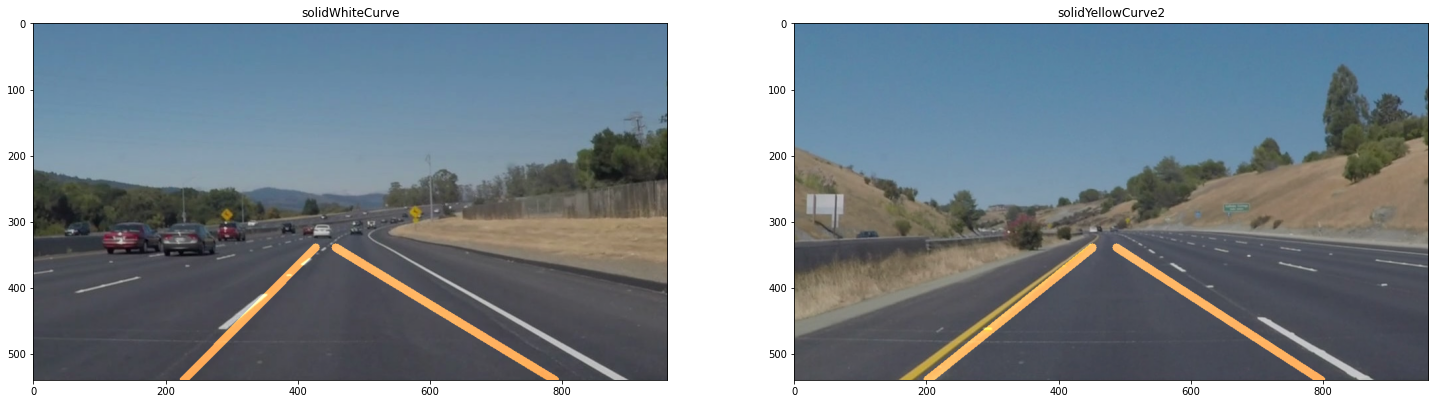

In [ ]:
cv2.namedWindow('Hough tunning')
cv2.createTrackbar('Threshold','Hough tunning',5,20,nothing)
cv2.createTrackbar('MinLineLength','Hough tunning',10,50,nothing)
cv2.createTrackbar('MaxLineGap','Hough tunning',15,35,nothing)

while(1):
    Threshold= cv2.getTrackbarPos('Threshold','Hough tunning')
    MinLineLength= cv2.getTrackbarPos('MinLineLength','Hough tunning')
    MaxLineGap= cv2.getTrackbarPos('MaxLineGap','Hough tunning')
    #HOUGH LINES PARAMETERS
    RHO = 1                 
    THETA = np.pi/180       
    def hough_lines(img):
        lines = cv2.HoughLinesP(img, RHO, THETA, Threshold, np.array([]), minLineLength=MinLineLength, maxLineGap=MaxLineGap)
        return lines
    k=cv2.waitKey(1)
    if(k==ord('q')):
      break
cv2.destroyAllWindows()

lines = hough_lines(ROI_edges_img) #HOUGH LINES
hough_lines_image = helpers_draw_lines(lines, ROI_edges_img)
lines2 = hough_lines(ROI_edges_img2)
hough_lines_image2 = helpers_draw_lines(lines2, ROI_edges_img2)

lanes  = helpers_formulate_lanes(lines, ROI_edges_img) #Formulate Lines
lanes2 = helpers_formulate_lanes(lines2, ROI_edges_img2)

lanes_image  = helpers_draw_lines(lanes, ROI_edges_img) #Draw Lines
lanes_image2 = helpers_draw_lines(lanes2, ROI_edges_img2)

final_image  = cv2.addWeighted(image, 0.8, lanes_image, 1, 0)
final_image2 = cv2.addWeighted(image2, 0.8, lanes_image2, 1, 0) 

f, (ax0,ax1) = plt.subplots(1, 2, figsize=(25,15))
ax0.imshow(final_image),ax0.set_title('solidWhiteCurve')
ax1.imshow(final_image2),ax1.set_title('solidYellowCurve2')
